<a href="https://colab.research.google.com/github/mazenmagdii/IMDB-Sentiment-Classification-Using-Raw-Text-Preprocessing-and-Deep-Learning/blob/main/IMDB_Sentiment_from_raw_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re
from pathlib import Path
import os
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import html
import unicodedata
import string
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

In [ ]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

Decoding one of these reviews back to English words: By getting the key-value as in imdb dataset the key is the word and the value is the index so by reversing it in a for loop it will decode them.

The IMDB dataset reserves the indices 0, 1, and 2 for special purposes:
0: Padding
1: Start of a sequence
2: Unknown word
The word indices start from 3. So, to get the actual word index, you need to subtract 3 from the encoded index (i).

In [ ]:
word_i= imdb.get_word_index()
reverse_word_i=dict([(value,key) for (key,value) in word_i.items()])
decoded_review=' '.join([reverse_word_i.get(i-3,'?') for i in x_train[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


This code to make sure that the word is the key in the dictionary and to review them.

In [ ]:
for word, index in word_i.items():
  print(f"The word '{word}' has the index {index}")

Streaming output truncated to the last 5000 lines.
The word ''face' has the index 51348
The word 'morel's' has the index 86485
The word 'recites' has the index 21109
The word 'gassy' has the index 86487
The word 'armpits' has the index 51349
The word 'deformed' has the index 10032
The word 'androgynous' has the index 30391
The word 'citra' has the index 86488
The word 'quivers' has the index 86489
The word 'presto' has the index 23495
The word ''animal' has the index 76646
The word 'excitedly' has the index 36812
The word 'bites' has the index 8415
The word 'biter' has the index 27495
The word 'claim' has the index 2305
The word 'stayin'' has the index 86490
The word 'amalio' has the index 51351
The word 'rottentomatoes' has the index 40479
The word 'mugur' has the index 51352
The word 'uruguay' has the index 40480
The word 'agent' has the index 1541
The word 'meneses' has the index 86491
The word 'negulesco' has the index 86492
The word 'flamboyance' has the index 27496
The word ''kid

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

This code snippet defines a directory path and creates it if it doesn't exist.

It first imports the Path class from the pathlib module and the os module. Then, it sets the variable DATA_PATH to the path './dat/'. Finally, it creates the directory if it doesn't already exist using DATA_PATH.mkdir(exist_ok=True).

In [ ]:
DATA_PATH=Path('./dat/')
DATA_PATH.mkdir(exist_ok=True)
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

In [ ]:
CLASSES = ['neg', 'pos']
PATH=Path('./dat/aclImdb/')

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
        for fname in (path/label).glob('*.*'):
            texts.append(fname.open('r', encoding='utf-8').read())
            labels.append(idx)
    return texts, labels


In [ ]:

trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

In [ ]:
for t in trn_texts[:5]:
  print(t)
  print('\n')

While watching the film, I'm not sure what direstion it was to take. There's a reason a writer shouldn't direct his work and even act in it as well, you can't do it all. I felt the story really suffered in this film due to the director wearing so many hats. Ms. McTeer is the film. To add to her amazing talents, her portrayal of this woman was why I was engaged. Here is a British actress who can do anything. In my view, conflict is what makes drama and a great story. I felt this film didn't have that. Everything was somewhat easy for the characters, there were no real obstacles preventing the chahracters from getting what they wanted. Watch the film for the sweetness, but most of all for Ms. McTeer's brilliant performance.


6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste y

Manual Split
But it has problem of showing punctuations with the words like 'movies.' and it will affect our model so we don't use the manual one.

In [ ]:
s = trn_texts[0]
s.split()

['While',
 'watching',
 'the',
 'film,',
 "I'm",
 'not',
 'sure',
 'what',
 'direstion',
 'it',
 'was',
 'to',
 'take.',
 "There's",
 'a',
 'reason',
 'a',
 'writer',
 "shouldn't",
 'direct',
 'his',
 'work',
 'and',
 'even',
 'act',
 'in',
 'it',
 'as',
 'well,',
 'you',
 "can't",
 'do',
 'it',
 'all.',
 'I',
 'felt',
 'the',
 'story',
 'really',
 'suffered',
 'in',
 'this',
 'film',
 'due',
 'to',
 'the',
 'director',
 'wearing',
 'so',
 'many',
 'hats.',
 'Ms.',
 'McTeer',
 'is',
 'the',
 'film.',
 'To',
 'add',
 'to',
 'her',
 'amazing',
 'talents,',
 'her',
 'portrayal',
 'of',
 'this',
 'woman',
 'was',
 'why',
 'I',
 'was',
 'engaged.',
 'Here',
 'is',
 'a',
 'British',
 'actress',
 'who',
 'can',
 'do',
 'anything.',
 'In',
 'my',
 'view,',
 'conflict',
 'is',
 'what',
 'makes',
 'drama',
 'and',
 'a',
 'great',
 'story.',
 'I',
 'felt',
 'this',
 'film',
 "didn't",
 'have',
 'that.',
 'Everything',
 'was',
 'somewhat',
 'easy',
 'for',
 'the',
 'characters,',
 'there',
 'were'

We can escape this by regex but it's bad in understanding meaning like:
Human-like robots are dump
It'll be 'Human' , 'like' , 'robots' , 'are' , 'dump'
or What's on your mind?
It'll be 'What' , 's' , 'on' , 'your' , 'mind' and the '?' will be removed

In [ ]:
re.split(r'\W+', s)

['While',
 'watching',
 'the',
 'film',
 'I',
 'm',
 'not',
 'sure',
 'what',
 'direstion',
 'it',
 'was',
 'to',
 'take',
 'There',
 's',
 'a',
 'reason',
 'a',
 'writer',
 'shouldn',
 't',
 'direct',
 'his',
 'work',
 'and',
 'even',
 'act',
 'in',
 'it',
 'as',
 'well',
 'you',
 'can',
 't',
 'do',
 'it',
 'all',
 'I',
 'felt',
 'the',
 'story',
 'really',
 'suffered',
 'in',
 'this',
 'film',
 'due',
 'to',
 'the',
 'director',
 'wearing',
 'so',
 'many',
 'hats',
 'Ms',
 'McTeer',
 'is',
 'the',
 'film',
 'To',
 'add',
 'to',
 'her',
 'amazing',
 'talents',
 'her',
 'portrayal',
 'of',
 'this',
 'woman',
 'was',
 'why',
 'I',
 'was',
 'engaged',
 'Here',
 'is',
 'a',
 'British',
 'actress',
 'who',
 'can',
 'do',
 'anything',
 'In',
 'my',
 'view',
 'conflict',
 'is',
 'what',
 'makes',
 'drama',
 'and',
 'a',
 'great',
 'story',
 'I',
 'felt',
 'this',
 'film',
 'didn',
 't',
 'have',
 'that',
 'Everything',
 'was',
 'somewhat',
 'easy',
 'for',
 'the',
 'characters',
 'there',
 

In [ ]:
s = trn_texts[0]
s

"While watching the film, I'm not sure what direstion it was to take. There's a reason a writer shouldn't direct his work and even act in it as well, you can't do it all. I felt the story really suffered in this film due to the director wearing so many hats. Ms. McTeer is the film. To add to her amazing talents, her portrayal of this woman was why I was engaged. Here is a British actress who can do anything. In my view, conflict is what makes drama and a great story. I felt this film didn't have that. Everything was somewhat easy for the characters, there were no real obstacles preventing the chahracters from getting what they wanted. Watch the film for the sweetness, but most of all for Ms. McTeer's brilliant performance."

Using NLTK to tokenize the texts
sent_tokenize --> for sentence

In [ ]:
nltk.tokenize.sent_tokenize(s)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["While watching the film, I'm not sure what direstion it was to take.",
 "There's a reason a writer shouldn't direct his work and even act in it as well, you can't do it all.",
 'I felt the story really suffered in this film due to the director wearing so many hats.',
 'Ms. McTeer is the film.',
 'To add to her amazing talents, her portrayal of this woman was why I was engaged.',
 'Here is a British actress who can do anything.',
 'In my view, conflict is what makes drama and a great story.',
 "I felt this film didn't have that.",
 'Everything was somewhat easy for the characters, there were no real obstacles preventing the chahracters from getting what they wanted.',
 "Watch the film for the sweetness, but most of all for Ms. McTeer's brilliant performance."]

In [ ]:
word_tokenize('human-like robots are dump, but cute')

['human-like', 'robots', 'are', 'dump', ',', 'but', 'cute']

But it keeps Punct. so, to solve this problem by creating a new list called words using a list comprehension. It iterates through each word in the tokenized sentence and only includes words that consist entirely of alphabetic characters.

In [ ]:
s = "What's up?"
words = [w for w in word_tokenize(s) if w.isalpha()]
words

['What', 'up']

To solve the stoopwords problem

In [ ]:
print(stop_words)
s = 'The cat sat on the mat'
words = [w for w in s.split() if w not in stop_words]
words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['The', 'cat', 'sat', 'mat']

But word like The didn't get removed because The T is in uppercase so you have to lowercase all words first

In [ ]:
s = 'The cat sat on the mat'
words = [w for w in s.lower().split() if w not in stop_words]
words

['cat', 'sat', 'mat']

Stemming

In [ ]:
v = {'the':1, 'cat':2, 'sat': 3, 'on': 4, 'mat':5}
porter = PorterStemmer()
s = 'the cats sat on the mats'
stemmed = [porter.stem(word) for word in s.split()]
print(stemmed)
x = [v[w] for w in stemmed]
print(x)

['the', 'cat', 'sat', 'on', 'the', 'mat']
[1, 2, 3, 4, 1, 5]


Lemmatizing

In [ ]:
lemmatizer = WordNetLemmatizer()
s = 'The little girls rided in the cars'
[lemmatizer.lemmatize(word) for word in s.split()]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['The', 'little', 'girl', 'rided', 'in', 'the', 'car']

POS

In [ ]:
s = 'He is doing his homework.'
tagged = nltk.pos_tag(s.split())
tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('He', 'PRP'),
 ('is', 'VBZ'),
 ('doing', 'VBG'),
 ('his', 'PRP$'),
 ('homework.', 'NN')]

Lemmatizers can be assigned a pos argument to tell which PoS class to lemmatize:


In [ ]:
s = 'He is going on a journey fishing on ships'
print([lemmatizer.lemmatize(word, pos='v') for word in s.split()])
print([lemmatizer.lemmatize(word, pos='n') for word in s.split()])

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']


There are many other NLP tools than NLTK. Keras is a DL framework, that also have some NLP tools, specially for tokenization.

But it suffers the same issues as split() on white spaces:

In [ ]:
text = 'human-like robots are dump, but cute'
result = text_to_word_sequence(text)
print(result)


['human', 'like', 'robots', 'are', 'dump', 'but', 'cute']


In [ ]:
texts = trn_texts + tst_texts
tok = Tokenizer()
tok.fit_on_texts(texts)

In [ ]:
tok.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'with': 15,
 'for': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'you': 21,
 'not': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'from': 35,
 'so': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'about': 41,
 'out': 42,
 "it's": 43,
 'if': 44,
 'has': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'even': 56,
 'my': 57,
 'she': 58,
 'would': 59,
 'which': 60,
 'their': 61,
 'only': 62,
 'story': 63,
 'really': 64,
 'see': 65,
 'can': 66,
 'had': 67,
 'were': 68,
 'well': 69,
 'me': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'great': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'other': 81,
 'will': 82,
 'p

In [ ]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)
tok.word_index['UNK']

1

We limited the num_words=100 for experimenting, but we will actually have the problem of stopwords and it will be in the top 100.


In [ ]:
tok = Tokenizer(num_words=100, oov_token='UNK')
tok.fit_on_texts(texts)
len(tok.word_index)

177726

Char tokenizing

In [ ]:
s = 'Hello World'
tok.texts_to_sequences(s)

[[1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1]]

In [ ]:
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
t = Tokenizer()
t.fit_on_texts(docs)
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'work': 2, 'good': 1, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1})


BOW Method

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(texts)
bow = vectorizer.transform(texts[:10])
bow.shape

(10, 141875)

In [ ]:
vectorizer.vocabulary_

{'while': 137563,
 'watching': 136549,
 'the': 125436,
 'film': 45969,
 'not': 88021,
 'sure': 122020,
 'what': 137400,
 'direstion': 35356,
 'it': 64873,
 'was': 136447,
 'to': 126880,
 'take': 123461,
 'there': 125619,
 'reason': 102355,
 'writer': 139501,
 'shouldn': 113386,
 'direct': 35317,
 'his': 58512,
 'work': 139156,
 'and': 6497,
 'even': 42727,
 'act': 3421,
 'in': 62044,
 'as': 8758,
 'well': 137078,
 'you': 140612,
 'can': 20207,
 'do': 36502,
 'all': 5362,
 'felt': 45320,
 'story': 119965,
 'really': 102286,
 'suffered': 121235,
 'this': 125846,
 'due': 38320,
 'director': 35337,
 'wearing': 136784,
 'so': 116242,
 'many': 77526,
 'hats': 56610,
 'ms': 84193,
 'mcteer': 79485,
 'is': 64675,
 'add': 3595,
 'her': 57682,
 'amazing': 5935,
 'talents': 123547,
 'portrayal': 97169,
 'of': 89151,
 'woman': 138878,
 'why': 137895,
 'engaged': 41150,
 'here': 57725,
 'british': 17877,
 'actress': 3489,
 'who': 137784,
 'anything': 7348,
 'my': 85051,
 'view': 134746,
 'conflict'

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(texts)
bow = vectorizer.transform(texts[:10])
bow.shape

(10, 141875)

TF-IDF

In [ ]:
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]

vectorizer = TfidfVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
vector = vectorizer.transform([text[0]])
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    return [word for word in words if word not in stop_words]


def lemmatize_words(words):

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)
def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)
def normalize_corpus(corpus):
  return [normalize_text(t) for t in corpus]

In [ ]:
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')
trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

In [ ]:
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
x_train = tok.texts_to_matrix(trn_texts, mode='tfidf')
x_test = tok.texts_to_matrix(tst_texts, mode='tfidf')



In [ ]:
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
  Dense(16, activation='relu', input_shape=(10000,)),
  Dropout(0.5),
  Dense(8, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,161 (625.63 KB)

 Trainable params: 160,161 (625.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

It's just an experiment using Dense layer like in the past

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=True)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5747 - loss: 0.6795 - val_accuracy: 0.8556 - val_loss: 0.4127
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7740 - loss: 0.4733 - val_accuracy: 0.8681 - val_loss: 0.3402
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8308 - loss: 0.3873 - val_accuracy: 0.8690 - val_loss: 0.3165
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8585 - loss: 0.3212 - val_accuracy: 0.8653 - val_loss: 0.3268
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8725 - loss: 0.2865 - val_accuracy: 0.8680 - val_loss: 0.3398
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8848 - loss: 0.2560 - val_accuracy: 0.8673 - val_loss: 0.3719
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8904 - loss: 0.2403 - val_accuracy: 0.8643 - val_loss: 0.3884
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8890 - loss: 0.2290 - val_accu

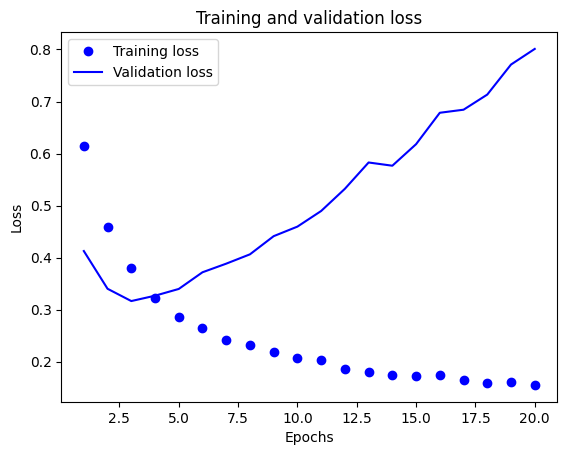

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

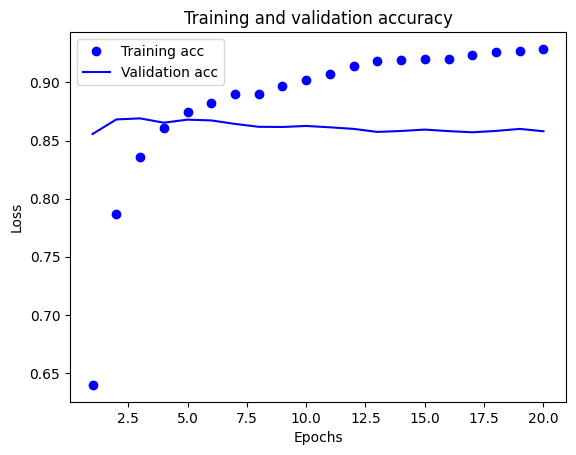

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Freq

In [ ]:
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
x_train = tok.texts_to_matrix(trn_texts, mode='freq')
x_test = tok.texts_to_matrix(tst_texts, mode='freq')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=True)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6415 - loss: 0.6330 - val_accuracy: 0.8297 - val_loss: 0.5648
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7468 - loss: 0.5623 - val_accuracy: 0.8683 - val_loss: 0.5020
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7865 - loss: 0.5072 - val_accuracy: 0.8618 - val_loss: 0.4498
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8152 - loss: 0.4592 - val_accuracy: 0.8708 - val_loss: 0.3973
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8327 - loss: 0.4190 - val_accuracy: 0.8701 - val_loss: 0.3679
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8493 - loss: 0.3900 - val_accuracy: 0.8738 - val_loss: 0.3496
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8613 - loss: 0.3643 - val_accuracy: 0.8746 - val_loss: 0.3287
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8658 - loss: 0.3476 - val_accu

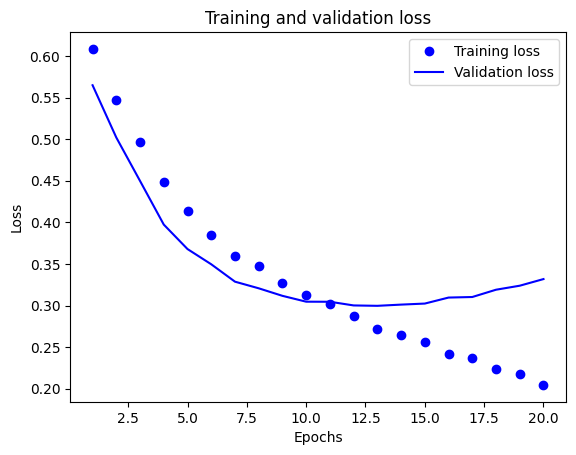

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

If you focus on the difference you will see that freq is better and can reach a higher accuracy

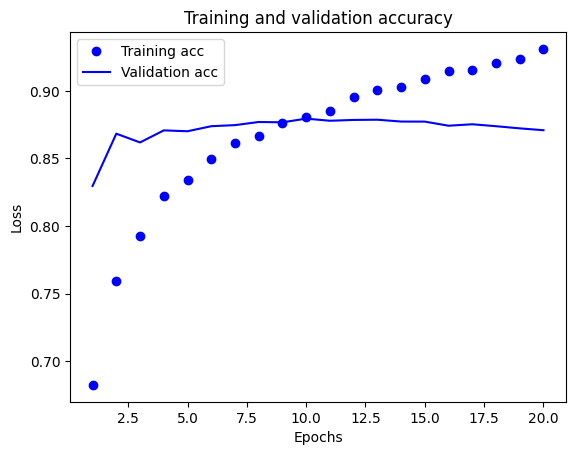

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()